In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [121]:
data = '/Users/lorenzotara/Documents/EPFL/Applied Data Analysis/Homeworks/ADA2017-Homeworks/04 - Applied ML/lalonde.csv'

In [122]:
lalonde = pd.read_csv(data)
lalonde.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


## 1

1. A naive analysis

Compare the distribution of the outcome variable (re78) between the two groups, using plots and numbers. To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

Here we show the distribution of re78 on the entire dataset.

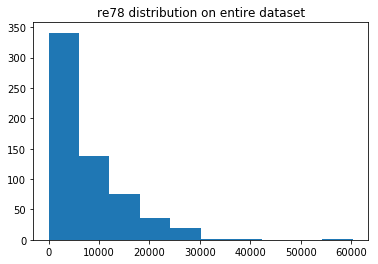

In [370]:
fig, ax = plt.subplots()
ax.hist(lalonde.re78)
ax.set_title("re78 distribution on entire dataset")
plt.show()

Here instead, we show the distributions of re78 first on treated subjects dataset and then on the not treated subjects dataset.

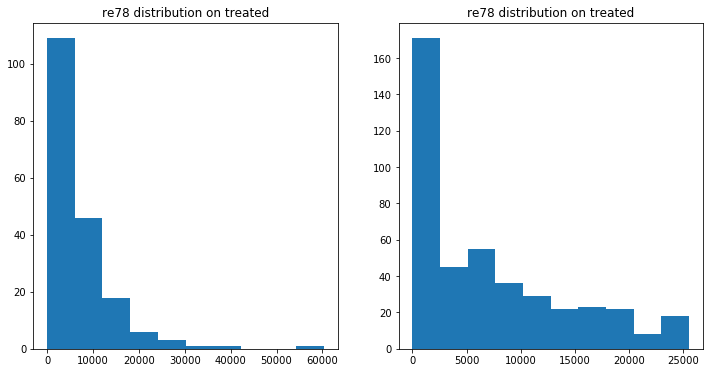

In [371]:
lalonde_treat = lalonde[lalonde.treat == 1]
lalonde_notreat = lalonde[lalonde.treat == 0]

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].hist(lalonde_treat.re78)
axs[0].set_title("re78 distribution on treated")
axs[1].hist(lalonde_notreat.re78)
axs[1].set_title("re78 distribution on treated")
plt.show()

In [372]:
lalonde_treat.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [373]:
lalonde_notreat.re78.describe()

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64

### With this naive analysis we can conclude that... TODO!!!

## 2

2 A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above. You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers. As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe? Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

* First we will compare the features showing the differences between the two groups and then we will compare the distributions of every feature in both groups.

### Comparing features

* In order to see the differences of the ages in the two groups, we decided to divide the feature in 7 different groups, as you can see below. We counted how many patients of the same age are in a specific range (with value_counts) and then we summed the results all together. Example: in the first subset we could have had something like: 17 = 4, 18 = 2, 19 = 1, 20 = 12, 21 = 3, 22 = 7, 23 = 1, 24 = 8, 25 = 16; if we sum everything together we will obtain how many patients are in that range.
* Finally we plot our results.

In [153]:
age_17_25_treat = lalonde_treat[lalonde_treat.age < 26].age.value_counts().sum()
age_17_25_notreat = lalonde_notreat[lalonde_notreat.age < 26].age.value_counts().sum()

age_26_30_treat = lalonde_treat[(lalonde_treat.age >= 26) & (lalonde_treat.age < 31)].age.value_counts().sum()
age_26_30_notreat = lalonde_notreat[(lalonde_notreat.age >= 26) & (lalonde_notreat.age < 31)].age.value_counts().sum()

age_31_35_treat = lalonde_treat[(lalonde_treat.age >= 31) & (lalonde_treat.age < 36)].age.value_counts().sum()
age_31_35_notreat = lalonde_notreat[(lalonde_notreat.age >= 31) & (lalonde_notreat.age < 36)].age.value_counts().sum()

age_36_40_treat = lalonde_treat[(lalonde_treat.age >= 36) & (lalonde_treat.age < 41)].age.value_counts().sum()
age_36_40_notreat = lalonde_notreat[(lalonde_notreat.age >= 36) & (lalonde_notreat.age < 41)].age.value_counts().sum()

age_41_45_treat = lalonde_treat[(lalonde_treat.age >= 36) & (lalonde_treat.age < 41)].age.value_counts().sum()
age_41_45_notreat = lalonde_notreat[(lalonde_notreat.age >= 36) & (lalonde_notreat.age < 41)].age.value_counts().sum()

age_46_50_treat = lalonde_treat[(lalonde_treat.age >= 46) & (lalonde_treat.age < 51)].age.value_counts().sum()
age_46_50_notreat = lalonde_notreat[(lalonde_notreat.age >= 46) & (lalonde_notreat.age < 51)].age.value_counts().sum()

age_51_more_treat = lalonde_treat[lalonde_treat.age >= 51].age.value_counts().sum()
age_51_more_notreat = lalonde_notreat[lalonde_notreat.age >= 51].age.value_counts().sum()

age_treated = [age_17_25_treat, age_26_30_treat, age_31_35_treat, age_36_40_treat, age_41_45_treat, age_46_50_treat, age_51_more_treat]
age_notreated = [age_17_25_notreat, age_26_30_notreat, age_31_35_notreat, age_36_40_notreat, age_41_45_notreat, age_46_50_notreat, age_51_more_notreat]

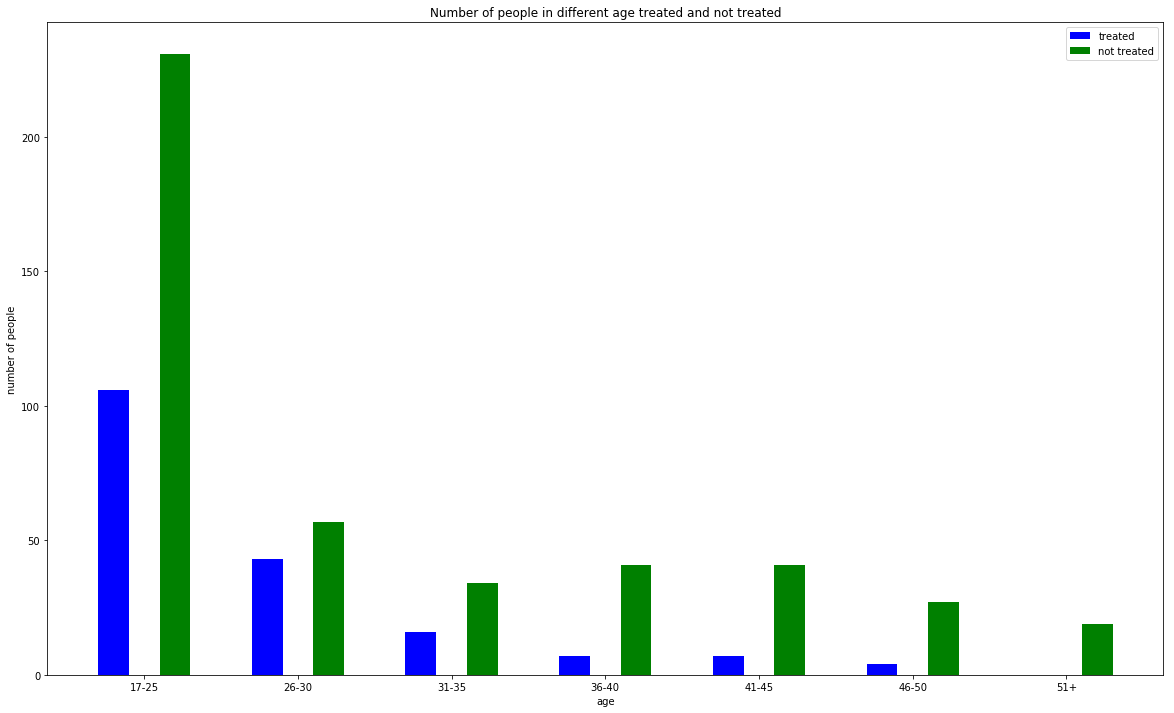

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))

x_age = np.array([1,2,3,4,5,6,7])
labels_age = ['17-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']

ax.bar(x_age - 0.2, age_treated, width=0.2, color ='b')
ax.bar(x_age + 0.2, age_notreated, width=0.2, color='g')
ax.set_xticks(x_age)
ax.set_xticklabels(labels_age)
ax.set_xlabel('age')
ax.set_ylabel('number of people')
ax.set_title("Number of people in different age treated and not treated")
ax.legend(['treated', 'not treated'])
plt.show()

* DESCRIBE

* For both groups we count the number of patients for different characteristics: black, hispanic, married, with no degree.
* Then we plot the results

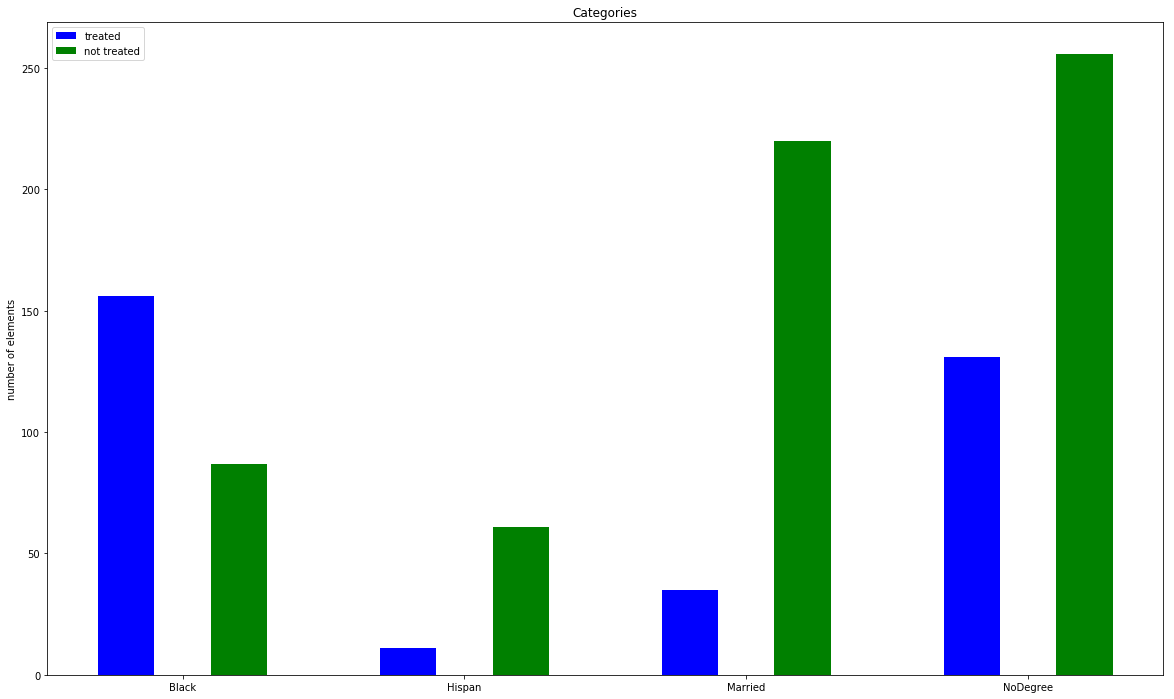

In [374]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))
#x1 = np.arange(lalonde_treat.shape[0])
#x2 = np.arange(lalonde_notreat.shape[0])
#
#axs[0].scatter(x1, lalonde_treat.age)
#axs[0].scatter(x2, lalonde_notreat.age)
#axs[0].set_ylabel('age')
#axs[0].set_title("Age per group - to delete")
#axs[0].legend(['treated', 'not treated'])

x_category = np.array([1,2,3,4])
labels_category = ["Black", "Hispan", "Married", "NoDegree"]
y_treat = [lalonde_treat.black.sum(), lalonde_treat.hispan.sum(), lalonde_treat.married.sum(), lalonde_treat.nodegree.sum()]
y_notreat = [lalonde_notreat.black.sum(), lalonde_notreat.hispan.sum(), lalonde_notreat.married.sum(), lalonde_notreat.nodegree.sum()]
ax.bar(x_category-0.2, y_treat, width=0.2, color='b')
ax.bar(x_category+0.2, y_notreat, width=0.2, color='g')
ax.set_xticks(x_category, minor=False)
ax.set_xticklabels(labels_category)
ax.set_ylabel('number of elements')
ax.set_title("Categories")
ax.legend(['treated', 'not treated'])

plt.show()

* DESCRIBE

* Here we want to show the difference in the two groups of years of education

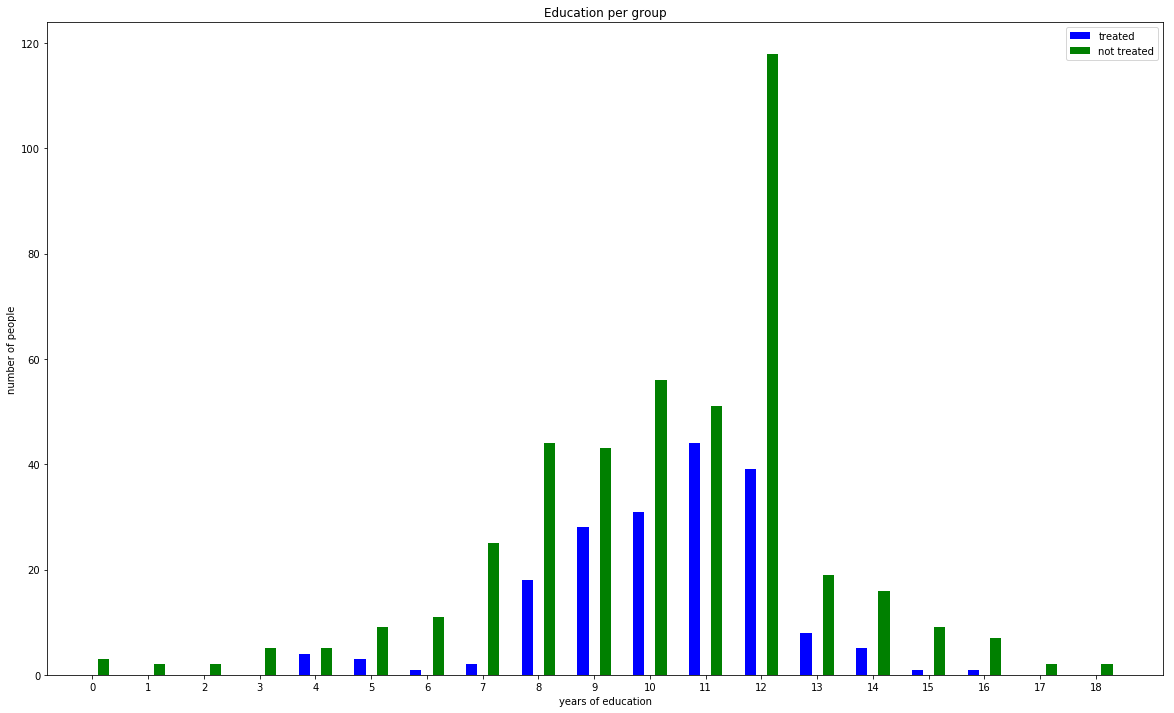

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))

education_treat = lalonde_treat.educ.value_counts().sort_index()
education_notreat = lalonde_notreat.educ.value_counts().sort_index()
ax.bar(education_treat.index.values - 0.2, education_treat.values, width=0.2, color ='b')
ax.bar(education_notreat.index.values + 0.2, education_notreat.values, width=0.2, color='g')
ax.set_xticks(education_notreat.index.values)
ax.set_xlabel('years of education')
ax.set_ylabel('number of people')
ax.set_title("Education per group")
ax.legend(['treated', 'not treated'])
plt.show()

* DESCRIBE

### At this point, we can say that... TODO!!!!!

### Distributions

#### Age

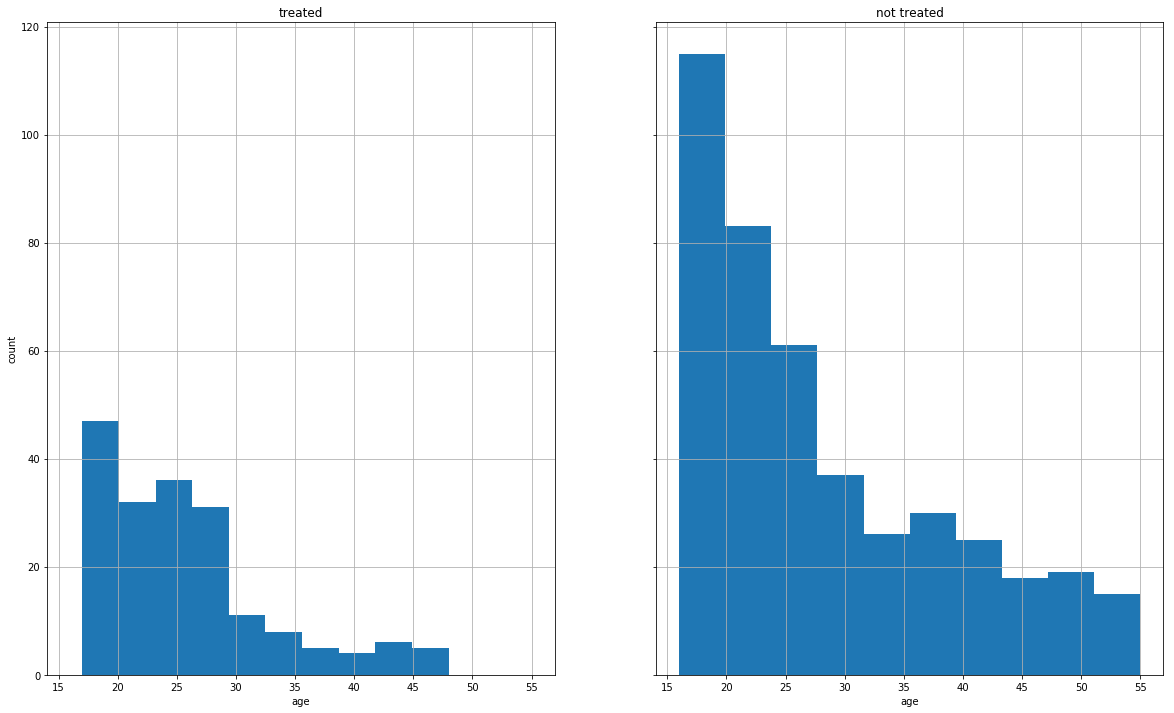

In [375]:
fig, axs = plt.subplots(1, 2, figsize=(20,12), sharex=True, sharey=True)

lalonde_treat.age.hist(ax=axs[0])
lalonde_notreat.age.hist(ax=axs[1])
axs[0].set_xlabel("age")
axs[0].set_title("treated")
axs[1].set_xlabel("age")
axs[1].set_title("not treated")
axs[0].set_ylabel("count")
plt.show()

In [376]:
lalonde_treat.age.describe()

count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

In [377]:
lalonde_notreat.age.describe()

count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64

* DESCRIBE

#### Education

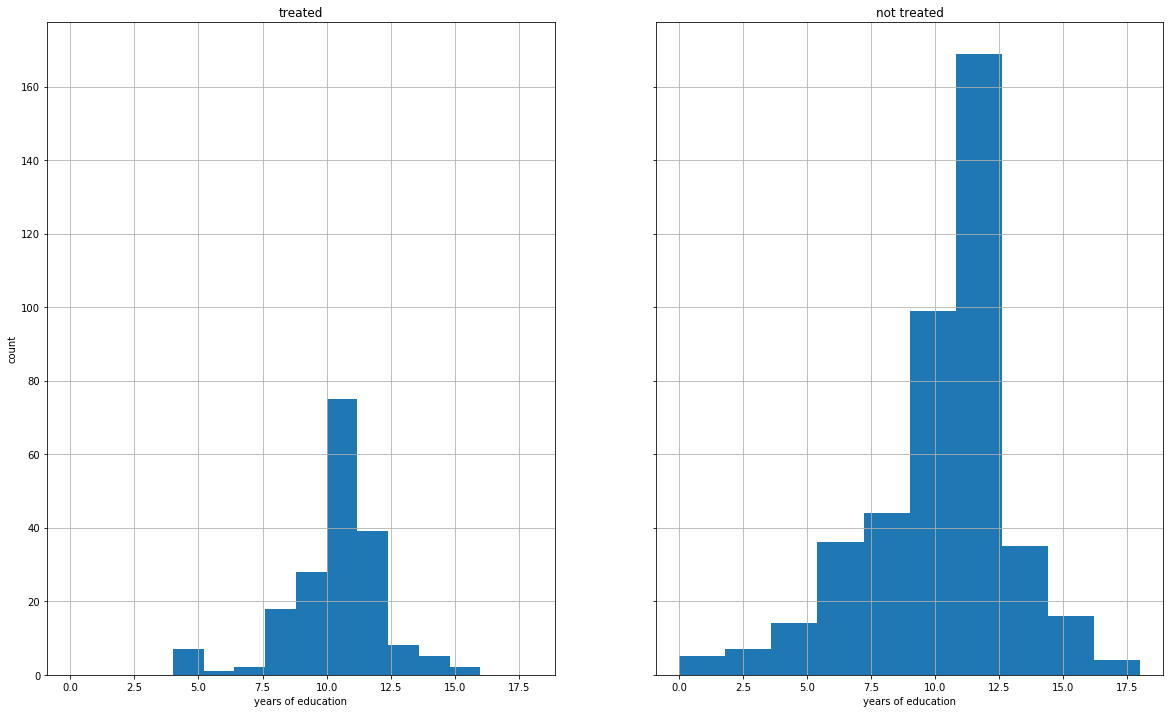

In [378]:
fig, axs = plt.subplots(1, 2, figsize=(20,12), sharex=True, sharey=True)

lalonde_treat.educ.hist(ax=axs[0])
lalonde_notreat.educ.hist(ax=axs[1])
axs[0].set_xlabel("years of education")
axs[0].set_title("treated")
axs[1].set_xlabel("years of education")
axs[1].set_title("not treated")
axs[0].set_ylabel("count")
plt.show()

In [379]:
lalonde_treat.educ.describe()

count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64

In [380]:
lalonde_notreat.educ.describe()

count    429.000000
mean      10.235431
std        2.855238
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64

* DESCRIBE

#### Categories

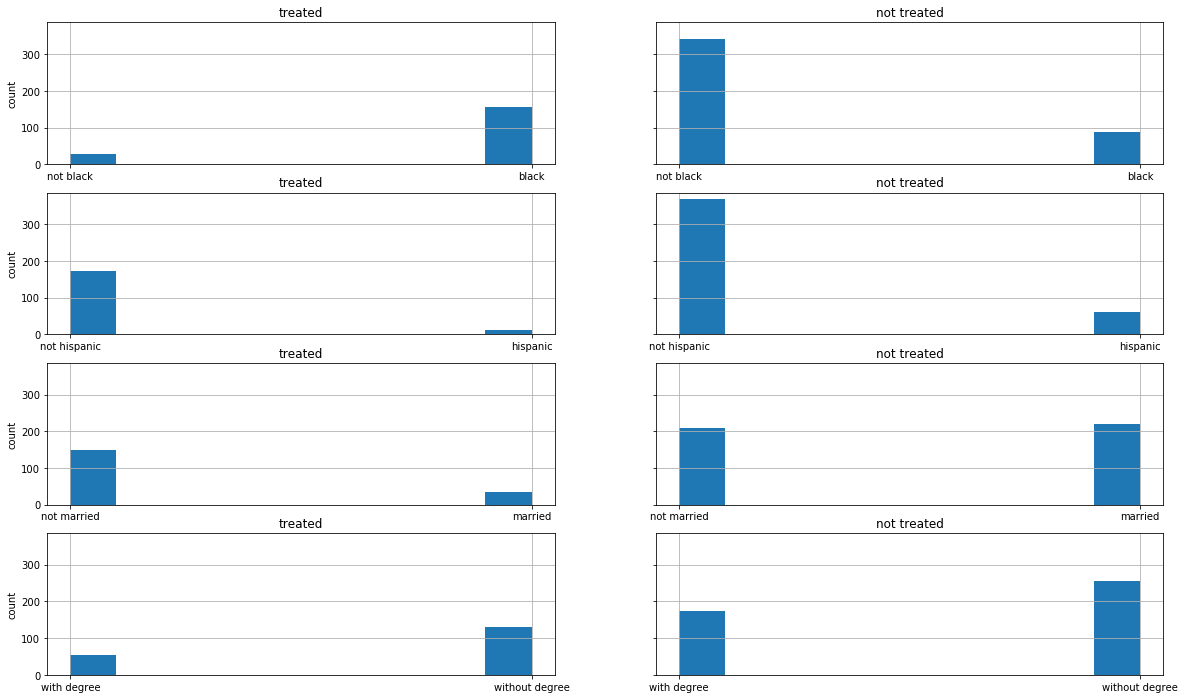

In [381]:
fig, axs = plt.subplots(4, 2, figsize=(20,12), sharey=True)

lalonde_treat.black.hist(ax=axs[0,0])
lalonde_notreat.black.hist(ax=axs[0,1])
axs[0,0].set_xticks(np.array([0,1]))
axs[0,0].set_xticklabels(['not black', 'black'])
axs[0,0].set_title("treated")
axs[0,1].set_xticks(np.array([0,1]))
axs[0,1].set_xticklabels(['not black', 'black'])
axs[0,1].set_title("not treated")
axs[0,0].set_ylabel("count")

lalonde_treat.hispan.hist(ax=axs[1,0])
lalonde_notreat.hispan.hist(ax=axs[1,1])
axs[1,0].set_xticks(np.array([0,1]))
axs[1,0].set_xticklabels(['not hispanic', 'hispanic'])
axs[1,0].set_title("treated")
axs[1,1].set_xticks(np.array([0,1]))
axs[1,1].set_xticklabels(['not hispanic', 'hispanic'])
axs[1,1].set_title("not treated")
axs[1,0].set_ylabel("count")

lalonde_treat.married.hist(ax=axs[2,0])
lalonde_notreat.married.hist(ax=axs[2,1])
axs[2,0].set_xticks(np.array([0,1]))
axs[2,0].set_xticklabels(['not married', 'married'])
axs[2,0].set_title("treated")
axs[2,1].set_xticks(np.array([0,1]))
axs[2,1].set_xticklabels(['not married', 'married'])
axs[2,1].set_title("not treated")
axs[2,0].set_ylabel("count")

lalonde_treat.nodegree.hist(ax=axs[3,0])
lalonde_notreat.nodegree.hist(ax=axs[3,1])
axs[3,0].set_xticks(np.array([0,1]))
axs[3,0].set_xticklabels(['with degree', 'without degree'])
axs[3,0].set_title("treated")
axs[3,1].set_xticks(np.array([0,1]))
axs[3,1].set_xticklabels(['with degree', 'without degree'])
axs[3,1].set_title("not treated")
axs[3,0].set_ylabel("count")

plt.show()

* DESCRIBE

### Maybe you should add also re74 and re75

#### re78

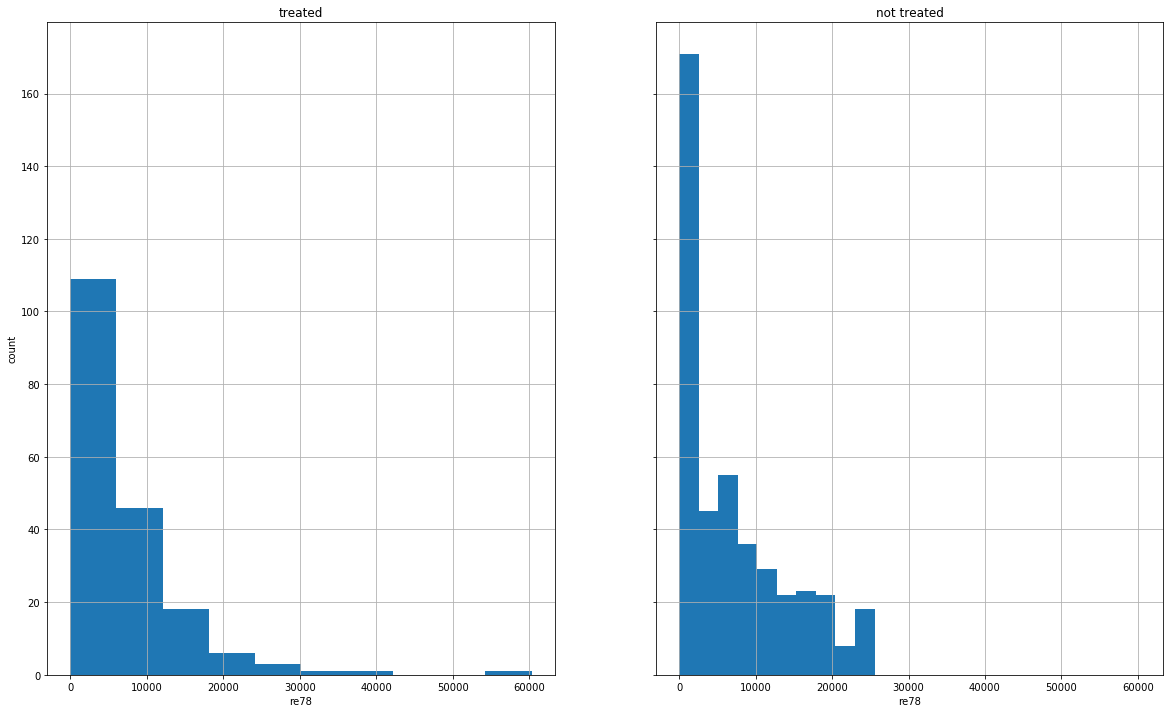

In [382]:
fig, axs = plt.subplots(1, 2, figsize=(20,12), sharex=True, sharey=True)

lalonde_treat.re78.hist(ax=axs[0])
lalonde_notreat.re78.hist(ax=axs[1])
axs[0].set_xlabel("re78")
axs[0].set_title("treated")
axs[1].set_xlabel("re78")
axs[1].set_title("not treated")
axs[0].set_ylabel("count")
plt.show()

In [383]:
lalonde_treat.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [384]:
lalonde_notreat.re78.describe()

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64

* DESCRIBE

* ### Taking a closer look to the data we observe that... Unlike the naive research, here we can state that... TODO!!!

## 3

3 A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset. You may use sklearn to fit the logistic regression model and apply it to each data point to obtain propensity scores:

from sklearn import linear_model
logistic = linear_model.LogisticRegression()
Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.). To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or this article.

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups. (See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores. If you want even more information, read this article.)

In [385]:
'''
Not used
'''
def build_poly(x, degree):
    
    new_x = x
    ones = np.ones(new_x.shape[0])
    
    for deg in range(degree):
        new_x = np.c_[new_x, new_x**degree+1]

    new_x = np.c_[ones, new_x]
    
    return new_x

'''
Gain 2%
'''
def normalize(x_par):
    
    x = x_par
    
    for column in x.columns:
        x[column] = (x[column] - x[column].mean())/x[column].std()
        
    return x

* Here we fit/train logistic regression in order to obtain a propensity score model. The propensity score is the probability that a patient is being treated given some features (covariates). Describe it better
##### Write the formula

We should work a little bit more on the data maybe if we want to obtain a better score.
* We also normalize the data because we obtain a better score. Of course we don't use the columns id and treat because they are not features - treat is the label - and also re78 because it refers to something that happened after being treated or not.

In [388]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
y = lalonde.treat
X = lalonde.drop(['id','treat', 're78'], axis=1)
#X = pd.concat([X, np.log(X.age).rename("age_log")], axis=1)
#X = pd.concat([X, np.log(X.re78+0.1).rename("age_log")], axis=1)

#X = build_poly(X, 2)
X[['age', 'educ', 're74', 're75']] = normalize(X[['age', 'educ', 're74', 're75']])

logistic.fit(X, y)
prediction = logistic.predict(X)
accuracy = sum(prediction == y) / len(y)
accuracy *100

/Users/lorenzotara/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


81.921824104234531

* The variable pred_proba is a ndarray of two dimensions: the first dimension is the probability that the patient is not treated (0), the second one in the propensity score, that is the probability that the patient is treated (1).

In [391]:
pred_proba = logistic.predict_proba(X)
pred_proba[:8]

array([[ 0.40521451,  0.59478549],
       [ 0.79462968,  0.20537032],
       [ 0.29272839,  0.70727161],
       [ 0.24420496,  0.75579504],
       [ 0.30681003,  0.69318997],
       [ 0.30937688,  0.69062312],
       [ 0.33905529,  0.66094471],
       [ 0.23122339,  0.76877661]])

## 4

4 Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group. (Hint: you may explore the networkx package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores. In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects. Compare the outcomes (re78) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects. What do you observe? Are you closer to being able to draw valid conclusions now than you were before?

* For the moment we just take the propensity score.

In [392]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

pscore = pred_proba[:,1]
pscore[:10]

array([ 0.59478549,  0.20537032,  0.70727161,  0.75579504,  0.69318997,
        0.69062312,  0.66094471,  0.76877661,  0.76028739,  0.06094147])

* We add the propensity score to the total df

In [393]:
matching_df = lalonde
matching_df['propensity'] = pscore
matching_df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.594785
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.205370
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.707272
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.755795
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.693190


* We take the propensity score of the treated and of the not treated

In [394]:
propensity_treat = matching_df[matching_df.treat == 1].propensity#.values.reshape(-1,1)
propensity_notreat = matching_df[matching_df.treat == 0].propensity#.values.reshape(-1,1)
# propensity_notreat.loc[341], propensity_notreat.iloc[156]
propensity_treat.head(), propensity_notreat.head()

(0    0.594785
 1    0.205370
 2    0.707272
 3    0.755795
 4    0.693190
 Name: propensity, dtype: float64, 185    0.041771
 186    0.027638
 187    0.036594
 188    0.048268
 189    0.393979
 Name: propensity, dtype: float64)

* In order to have comparable data we have to... describe why with observational data you use this method.
* We search for the nearest neighbor of a treated in the non treated taking account of only the propensity score.

In [395]:
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(propensity_notreat.values.reshape(-1,1))
'''
distances is an array that contains the distance between the propensity score of the treated patient 
and his nearest neighbor in the not treated patients dataset
'''
distances, indices = nbrs.kneighbors(propensity_treat.values.reshape(-1,1))
'''
These are the indices that refers to the position (not the real index!!!)
of the neighbor in the list propensity_notreat.values.reshape(-1,1)
'''
indices = indices.reshape(indices.shape[0])

matches = matching_df[matching_df.treat == 0].iloc[indices]
treated = matching_df[matching_df.treat == 1]
matches.head(), treated.head()

(          id  treat  age  educ  black  hispan  married  nodegree      re74  \
 552  PSID368      0   40    11      1       0        1         1     0.000   
 215   PSID31      0   22    13      0       1        0         0  6404.843   
 595  PSID411      0   18    10      1       0        0         1     0.000   
 410  PSID226      0   39    10      1       0        0         1   844.444   
 402  PSID218      0   17     9      1       0        0         1     0.000   
 
           re75       re78  propensity  
 552     0.0000     0.0000    0.591675  
 215  7882.7900  9453.0170    0.203831  
 595     0.0000  5306.5160    0.705920  
 410   889.7903   701.9201    0.756107  
 402   981.0968  8900.3470    0.692434  ,
      id  treat  age  educ  black  hispan  married  nodegree  re74  re75  \
 0  NSW1      1   37    11      1       0        1         1   0.0   0.0   
 1  NSW2      1   22     9      0       1        0         1   0.0   0.0   
 2  NSW3      1   30    12      1       0        

## TODO: compare distributions of every feature in the two groups, but only matched